In [20]:
!pip uninstall PIL
!pip install Pillow

In [21]:
import os                      as os
from skimage.io                import imread
from skimage.transform         import resize
import numpy                   as np
import pandas                  as pd
import keras.utils             as image
import matplotlib.pyplot       as plt
from   tqdm                    import tqdm
from   PIL                     import Image
from   keras.utils             import to_categorical
from   sklearn.model_selection import train_test_split
from keras.models              import Sequential
from keras.layers              import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
%matplotlib inline

In [22]:
mpaffected_folder  = "../input/monkeypoxtanvir/Monkey Pox/"
not_affeted_folder = "../input/monkeypoxtanvir/Others/"

In [23]:
monkey_pox_data = []
for i in tqdm(os.listdir(mpaffected_folder)):
    img = image.load_img(mpaffected_folder+i,target_size=(299,299,3))
    img = image.img_to_array(img)
    img = img/255
    monkey_pox_data.append([img,1])
for i in tqdm(os.listdir(not_affeted_folder)):
    img = image.load_img(not_affeted_folder+i,target_size=(299,299,3))
    img = image.img_to_array(img)
    img = img/255
    monkey_pox_data.append([img,0])

100%|██████████| 971/971 [00:02<00:00, 351.95it/s]


Text(0.5, 1.0, 'Not Affected')

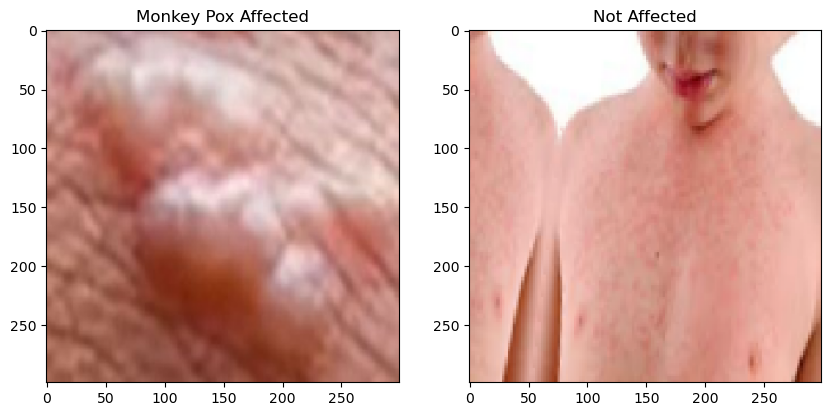

In [24]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(monkey_pox_data[0][0])
plt.title("Monkey Pox Affected")
fig.add_subplot(1, 2, 2)
plt.imshow(monkey_pox_data[227][0])
plt.title("Not Affected")


In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19

In [26]:
X=[]
for x in monkey_pox_data:
    X.append(x[0])
    

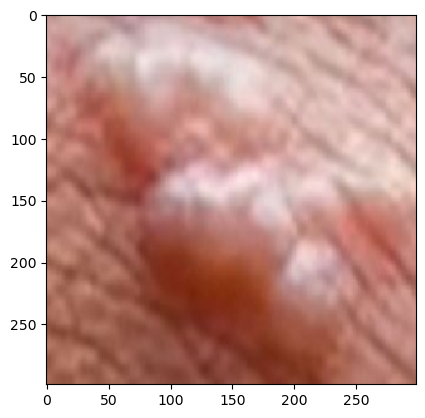

In [27]:
plt.imshow(X[0])

In [28]:
Y = []
for y in monkey_pox_data:
    Y.append(y[1])

In [29]:
np.array(Y)

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
import tensorflow as tf
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [31]:
a = []
for image in x_train:
    a.append(image.flatten())

In [32]:
X_train = pd.DataFrame(a)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,268193,268194,268195,268196,268197,268198,268199,268200,268201,268202
0,0.411765,0.270588,0.270588,0.411765,0.270588,0.270588,0.411765,0.270588,0.270588,0.415686,...,0.760784,0.788235,0.729412,0.768627,0.788235,0.729412,0.768627,0.792157,0.729412,0.772549
1,0.250980,0.639216,0.756863,0.250980,0.639216,0.756863,0.250980,0.639216,0.752941,0.250980,...,0.356863,0.490196,0.439216,0.356863,0.321569,0.325490,0.282353,0.321569,0.325490,0.282353
2,0.501961,0.337255,0.282353,0.482353,0.317647,0.266667,0.482353,0.317647,0.266667,0.458824,...,0.462745,0.509804,0.470588,0.462745,0.509804,0.470588,0.462745,0.509804,0.470588,0.462745
3,0.850980,0.682353,0.654902,0.850980,0.682353,0.654902,0.839216,0.666667,0.643137,0.839216,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.203922,0.164706,0.184314,0.203922,0.164706,0.184314,0.203922,0.180392,0.223529,0.203922,...,0.266667,0.517647,0.403922,0.266667,0.596078,0.498039,0.364706,0.596078,0.498039,0.364706


In [33]:
a = []
for image in x_test:
    a.append(image.flatten())
X_test = pd.DataFrame(a)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,268193,268194,268195,268196,268197,268198,268199,268200,268201,268202
0,0.831373,0.827451,0.811765,0.835294,0.831373,0.815686,0.835294,0.831373,0.815686,0.839216,...,0.901961,0.854902,0.866667,0.886275,0.854902,0.866667,0.886275,0.827451,0.839216,0.858824
1,0.466667,0.313726,0.227451,0.466667,0.313726,0.227451,0.584314,0.403922,0.301961,0.584314,...,0.262745,0.494118,0.341176,0.262745,0.521569,0.360784,0.278431,0.521569,0.360784,0.278431
2,0.596078,0.537255,0.513726,0.596078,0.537255,0.513726,0.596078,0.529412,0.501961,0.596078,...,0.317647,0.541176,0.388235,0.317647,0.529412,0.376471,0.309804,0.529412,0.376471,0.309804
3,0.807843,0.611765,0.545098,0.807843,0.611765,0.545098,0.819608,0.623529,0.556863,0.819608,...,0.223529,0.494118,0.298039,0.223529,0.478431,0.282353,0.207843,0.478431,0.282353,0.207843
4,0.811765,0.701961,0.619608,0.807843,0.698039,0.615686,0.807843,0.698039,0.615686,0.819608,...,0.364706,0.619608,0.474510,0.368627,0.619608,0.474510,0.368627,0.600000,0.454902,0.352941


In [34]:
Y_Train = pd.DataFrame(y_train,columns=['Target'])
Y_Test = pd.DataFrame(y_test,columns=['Target'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [36]:
# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
model1 = Sequential()
model1.add(base_model)
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [37]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model1.fit(np.array(x_train),np.array(y_train),epochs=30,validation_data=(np.array(x_test),np.array(y_test)),callbacks=[early_stop])

Epoch 1/30
46/46 [==============================] - 422s 9s/step - loss: 0.4319 - accuracy: 0.8122 - val_loss: 0.2872 - val_accuracy: 0.9010
Epoch 2/30
46/46 [==============================] - 374s 8s/step - loss: 0.1938 - accuracy: 0.9278 - val_loss: 0.2774 - val_accuracy: 0.8825
Epoch 3/30
46/46 [==============================] - 376s 8s/step - loss: 0.1270 - accuracy: 0.9457 - val_loss: 0.2102 - val_accuracy: 0.9320
Epoch 4/30
46/46 [==============================] - 367s 8s/step - loss: 0.1184 - accuracy: 0.9512 - val_loss: 0.1890 - val_accuracy: 0.9402
Epoch 5/30
46/46 [==============================] - 376s 8s/step - loss: 0.0740 - accuracy: 0.9718 - val_loss: 0.2514 - val_accuracy: 0.9340
Epoch 6/30
46/46 [==============================] - 367s 8s/step - loss: 0.0865 - accuracy: 0.9635 - val_loss: 0.3611 - val_accuracy: 0.9278
Epoch 7/30
46/46 [==============================] - 366s 8s/step - loss: 0.0545 - accuracy: 0.9801 - val_loss: 1.4612 - val_accuracy: 0.8845
Epoch 8/30
46

In [38]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers:
    layer.trainable = False
model2 = Sequential()
model2.add(base_model)
model2.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model2.fit(np.array(x_train),np.array(y_train),epochs=30,validation_data=(np.array(x_test),np.array(y_test)),callbacks=[early_stop])

94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/30
46/46 [==============================] - 331s 7s/step - loss: 1.1890 - accuracy: 0.5316 - val_loss: 0.8402 - val_accuracy: 0.5052
Epoch 2/30
46/46 [==============================] - 385s 8s/step - loss: 0.6859 - accuracy: 0.5646 - val_loss: 0.6782 - val_accuracy: 0.5464
Epoch 3/30
46/46 [==============================] - 322s 7s/step - loss: 0.6524 - accuracy: 0.6080 - val_loss: 0.6510 - val_accuracy: 0.5979
Epoch 4/30
46/46 [==============================] - 335s 7s/step - loss: 0.6343 - accuracy: 0.6245 - val_loss: 0.6208 - val_accuracy: 0.6309
Epoch 5/30
46/46 [==============================] - 325s 7s/step - loss: 0.6314 - accuracy: 0.6589 - val_loss: 0.6271 - val_accuracy: 0.6247
Epoch 6/30
46/46 [==============================] - 336s 7s/step - loss: 0.6310 - accuracy: 0.6307 - val_loss: 0.6240 - val_accuracy: 0.6041
Epoch 7/30
46/46 [==============================] - 325s 7s/step - loss: 0.5976 - accurac

In [39]:
model1.evaluate(np.array(x_test),np.array(y_test))

16/16 [==============================] - 91s 6s/step - loss: 1.2030 - accuracy: 0.8784


[1.2029966115951538, 0.8783504962921143]

In [40]:
model2.evaluate(np.array(x_test),np.array(y_test))

16/16 [==============================] - 79s 5s/step - loss: 0.5678 - accuracy: 0.7196


[0.5678105354309082, 0.7195876240730286]

In [41]:
# X_train = x_train.flatten()
# X_test = x_test.flatten()
# Y_train = y_train.flatten()
# Y_test = y_test.flatten()

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [43]:
rf = RandomForestClassifier()
rf.fit(np.array(X_train),np.array(Y_Train))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [44]:
rf.score(X_test,Y_Test)

0.7649484536082474

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_Train)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [46]:
knn.score(X_test,Y_Test)

0.6948453608247422

In [47]:
svc = SVC()
svc.fit(X_train,Y_Train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [48]:
svc.score(X_test,Y_Test)

0.7628865979381443

In [49]:
results = pd.DataFrame()

In [50]:
d = model1.predict(np.array(x_test))

16/16 [==============================] - 92s 6s/step


In [51]:
result1 = []
for item in d:
    result1.append(np.argmax(item))
result1 = np.array(result1)

In [52]:
d = model2.predict(np.array(x_test))
result2 = []
for item in d:
    result2.append(np.argmax(item))
result2 = np.array(result2)

16/16 [==============================] - 91s 6s/step


In [53]:
result3 = np.array(knn.predict(X_test))

In [54]:
result4 = np.array(rf.predict(X_test))

In [55]:
result5 = np.array(svc.predict(X_test))

In [56]:
data = [result1,result3,result4,result5]

In [57]:
columns = ['XceptionPtModel', 'KNN',"RandomForest","SCV"]

In [58]:
df = pd.DataFrame(data,columns).T

In [59]:
df

,XceptionPtModel,KNN,RandomForest,SCV
0,0,0,0,0
1,0,1,0,1
2,1,1,1,1
3,1,0,1,1
4,0,0,1,1
...,...,...,...,...
480,1,1,0,1
481,0,0,0,0
482,1,0,1,1
483,0,1,0,1


In [60]:
majority = df.mode(axis=1)[0]

In [61]:
result_final = []
for item in majority:
    result_final.append(round(item))

In [62]:
result_final = np.array(result_final)

In [63]:
result_final

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [64]:
from  sklearn.metrics import accuracy_score

In [65]:
accuracy_score(np.array(y_test),result_final)

0.8309278350515464

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [67]:
cf = confusion_matrix(y_test,result_final)

<AxesSubplot:>

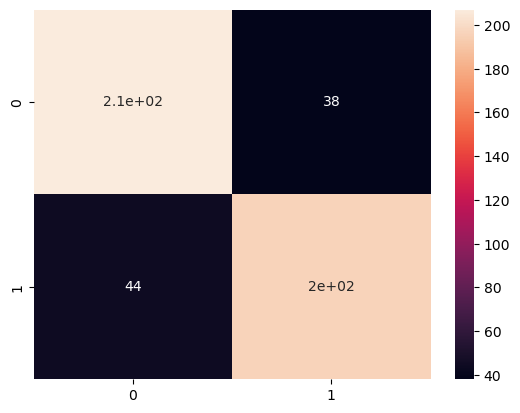

In [68]:
sns.heatmap(cf,annot=True)